In [44]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import math

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, accuracy_score
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_squared_error as mse

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.preprocessing import PolynomialFeatures

from sklearn.tree import DecisionTreeRegressor

from sklearn.neural_network import MLPRegressor

from sklearn.ensemble import RandomForestRegressor

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
openFiles = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Consumo_cerveja.csv')

In [46]:
openFiles.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900


In [47]:
openFiles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941 entries, 0 to 940
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Data                         365 non-null    object 
 1   Temperatura Media (C)        365 non-null    object 
 2   Temperatura Minima (C)       365 non-null    object 
 3   Temperatura Maxima (C)       365 non-null    object 
 4   Precipitacao (mm)            365 non-null    object 
 5   Final de Semana              365 non-null    float64
 6   Consumo de cerveja (litros)  365 non-null    float64
dtypes: float64(2), object(5)
memory usage: 51.6+ KB


In [48]:
openFiles.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900


In [49]:
openFiles['Precipitacao (mm)'] = openFiles['Precipitacao (mm)'].str.replace(",", ".").astype(float)
openFiles['Temperatura Minima (C)'] = openFiles['Temperatura Minima (C)'].str.replace(",", ".").astype(float)
openFiles['Temperatura Maxima (C)'] = openFiles['Temperatura Maxima (C)'].str.replace(",", ".").astype(float)
openFiles['Temperatura Media (C)'] = openFiles['Temperatura Media (C)'].str.replace(",", ".").astype(float)

In [50]:
openFiles['Data'] = pd.to_datetime(openFiles['Data'])
openFiles['year'] = openFiles['Data'].dt.year
openFiles['month'] = openFiles['Data'].dt.month
openFiles['day'] = openFiles['Data'].dt.day

In [51]:
openFiles=openFiles.drop(['Data'], axis=1)

In [52]:
missing_values=openFiles.isnull().sum()
percent_missing = openFiles.isnull().sum()/openFiles.shape[0]*100

value = {
    'missing_values':missing_values,
    'percent_missing':percent_missing
}
frame=pd.DataFrame(value)
frame

,missing_values,percent_missing
Temperatura Media (C),576,61.211477
Temperatura Minima (C),576,61.211477
Temperatura Maxima (C),576,61.211477
Precipitacao (mm),576,61.211477
Final de Semana,576,61.211477
Consumo de cerveja (litros),576,61.211477
year,576,61.211477
month,576,61.211477
day,576,61.211477


In [53]:
openFiles=openFiles.dropna(how='all')

minmax = MinMaxScaler()
openFiles[[i for i in list(openFiles.columns)[0:16]]] = minmax.fit_transform(openFiles[[i for i in list(openFiles.columns)[0:16]]])

In [54]:
openFiles

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros),year,month,day
0,0.902256,0.956835,0.818182,0.000000,0.0,0.471221,0.0,0.0,0.000000
1,0.884712,1.000000,0.863636,0.000000,0.0,0.620031,0.0,0.0,0.033333
2,0.746867,0.848921,0.700000,0.000000,1.0,0.698101,0.0,0.0,0.066667
3,0.694236,0.784173,0.640909,0.012658,1.0,0.655082,0.0,0.0,0.100000
4,0.684211,0.748201,0.627273,0.000000,0.0,0.616979,0.0,0.0,0.133333
...,...,...,...,...,...,...,...,...,...
360,0.695489,0.755396,0.622727,0.143460,1.0,0.761380,0.0,1.0,0.866667
361,0.610276,0.755396,0.554545,0.000000,0.0,0.498093,0.0,1.0,0.900000
362,0.550125,0.697842,0.436364,0.108650,0.0,0.337628,0.0,1.0,0.933333
363,0.531328,0.625899,0.359091,0.066456,0.0,0.259558,0.0,1.0,0.966667


In [55]:
y = openFiles['Consumo de cerveja (litros)']
x = openFiles.drop(['Consumo de cerveja (litros)'], axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [56]:
linearRegressor=LinearRegression()
linearRegressor.fit(x_train,y_train)
y_pred = linearRegressor.predict(x_test)

In [57]:
print("mean squared error is: ", mse(y_test, y_pred))
errors = abs(y_pred-y_test)
print('Mean Absolute Error: ', round(np.mean(errors), 2))
print('R2 score is: ', r2_score(y_test,y_pred))
print('median absolute error is: ', median_absolute_error(y_test, y_pred))
print('Accuracy: ', linearRegressor.score(x_test,y_test)*100)

mean squared error is:  0.010325622415473931
Mean Absolute Error:  0.08
R2 score is:  0.7406013522605528
median absolute error is:  0.07931199940365224
Accuracy:  74.06013522605528


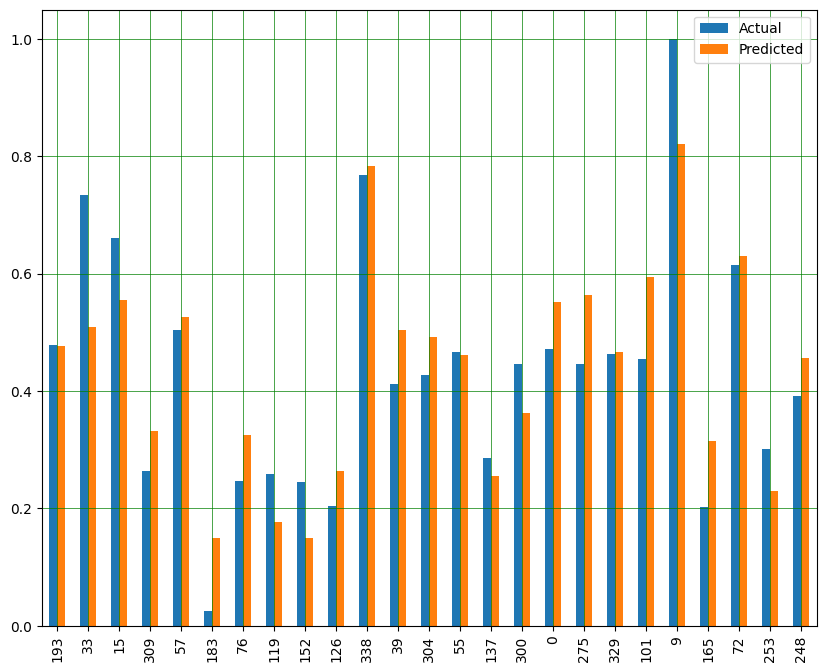

In [58]:
df = pd.DataFrame({'Actual':y_test, 'Predicted': y_pred})
df1 = df.head(25)
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major',linestyle='-',linewidth='0.5',color='green')
plt.grid(which='minor',linestyle=':',linewidth='0.5',color='black')
plt.show()

# Ridge Regularization

In [61]:
rr = Ridge(alpha=0.01)
rr.fit(x_train,y_train)
y_pred=rr.predict(x_test)
print("Mean squared error is: ", mse(y_test,y_pred))
errors = abs(y_pred-y_test)
print('Mean Absolute Error: ', round(np.mean(errors), 2))
print('R2 score is: ', r2_score(y_test, y_pred))
print('Median absolute error is: ', median_absolute_error(y_test,y_pred))
print('Accuracy is: ', rr.score(x_test, y_test)*100)

Mean squared error is:  0.01033336296549687
Mean Absolute Error:  0.08
R2 score is:  0.7404068953912311
Median absolute error is:  0.07914171599318087
Accuracy is:  74.04068953912311


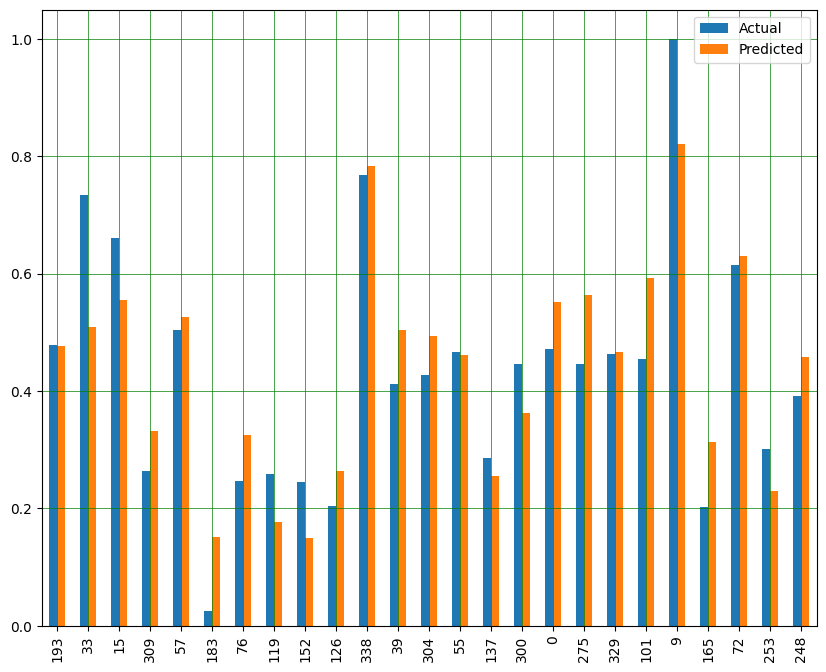

In [62]:
df = pd.DataFrame({'Actual':y_test, 'Predicted': y_pred})
df1 = df.head(25)
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major',linestyle='-',linewidth='0.5',color='green')
plt.grid(which='minor',linestyle=':',linewidth='0.5',color='black')
plt.show()

In [63]:
rr100 = Ridge(alpha=100)
rr100.fit(x_train,y_train)
y_pred=rr100.predict(x_test)
print("Mean squared error is: ", mse(y_test,y_pred))
errors = abs(y_pred-y_test)
print('Mean Absolute Error: ', round(np.mean(errors), 2))
print('R2 score is: ', r2_score(y_test, y_pred))
print('Median absolute error is: ', median_absolute_error(y_test,y_pred))
print('Accuracy is: ', rr100.score(x_test, y_test)*100)

Mean squared error is:  0.02912344835147316
Mean Absolute Error:  0.14
R2 score is:  0.26836535213988566
Median absolute error is:  0.12339424756015893
Accuracy is:  26.836535213988565


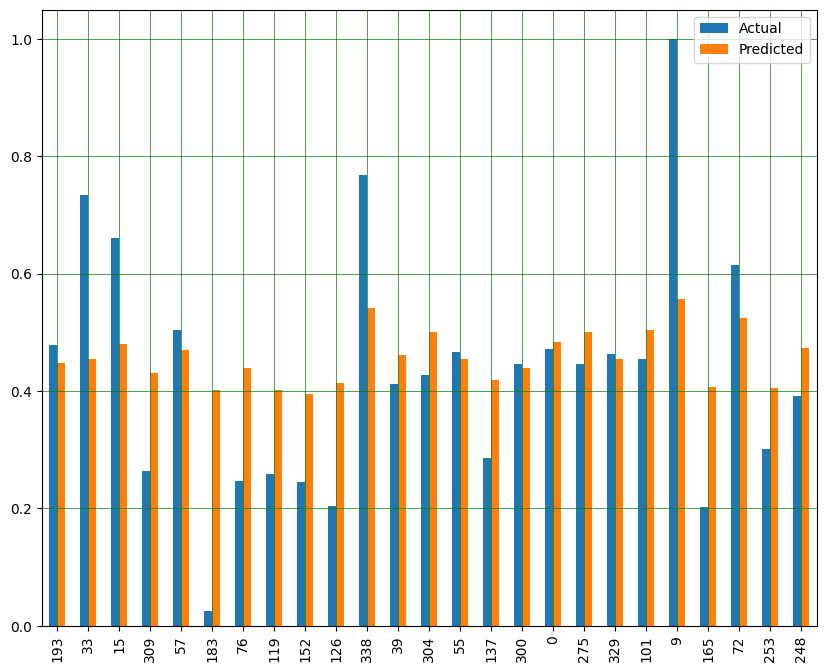

In [64]:
df = pd.DataFrame({'Actual':y_test, 'Predicted': y_pred})
df1 = df.head(25)
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major',linestyle='-',linewidth='0.5',color='green')
plt.grid(which='minor',linestyle=':',linewidth='0.5',color='black')
plt.show()

# Lasso Regularization

In [66]:
lasso001 = Lasso(alpha=0.01, max_iter=1000000)
lasso001.fit(x_train,y_train)
y_pred=lasso001.predict(x_test)
print("Mean squared error is: ", mse(y_test,y_pred))
errors = abs(y_pred-y_test)
print('Mean Absolute Error: ', round(np.mean(errors), 2))
print('R2 score is: ', r2_score(y_test, y_pred))
print('Median absolute error is: ', median_absolute_error(y_test,y_pred))
print('Accuracy is: ', lasso001.score(x_test, y_test)*100)

Mean squared error is:  0.01637166746601832
Mean Absolute Error:  0.1
R2 score is:  0.5887135679529751
Median absolute error is:  0.09440183669326713
Accuracy is:  58.871356795297515


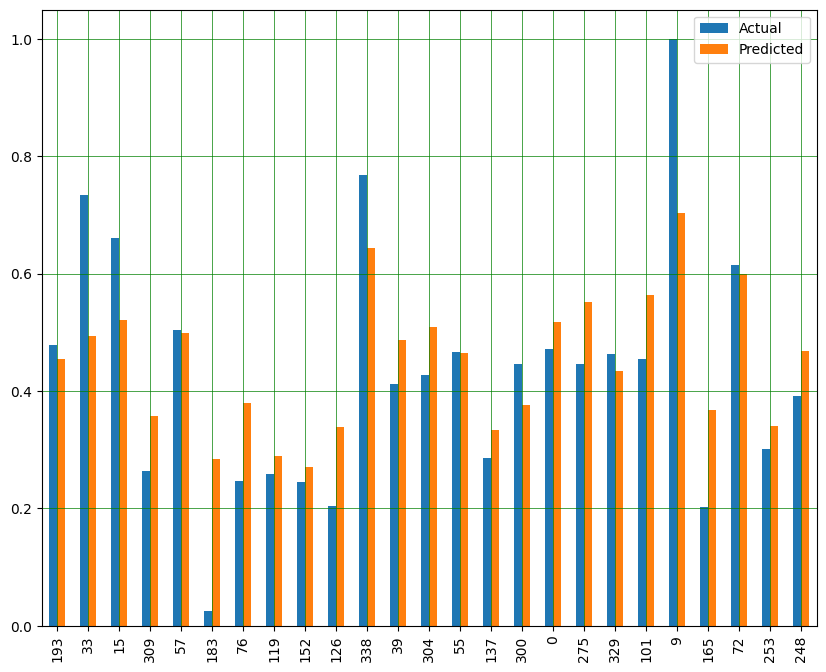

In [67]:
df = pd.DataFrame({'Actual':y_test, 'Predicted': y_pred})
df1 = df.head(25)
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major',linestyle='-',linewidth='0.5',color='green')
plt.grid(which='minor',linestyle=':',linewidth='0.5',color='black')
plt.show()

In [68]:
lasso00001 = Lasso(alpha=0.0001, max_iter=1000000)
lasso00001.fit(x_train,y_train)
y_pred=lasso00001.predict(x_test)
print("Mean squared error is: ", mse(y_test,y_pred))
errors = abs(y_pred-y_test)
print('Mean Absolute Error: ', round(np.mean(errors), 2))
print('R2 score is: ', r2_score(y_test, y_pred))
print('Median absolute error is: ', median_absolute_error(y_test,y_pred))
print('Accuracy is: ', lasso00001.score(x_test, y_test)*100)

Mean squared error is:  0.010366829207723376
Mean Absolute Error:  0.08
R2 score is:  0.7395661617648042
Median absolute error is:  0.07931864630102414
Accuracy is:  73.95661617648042


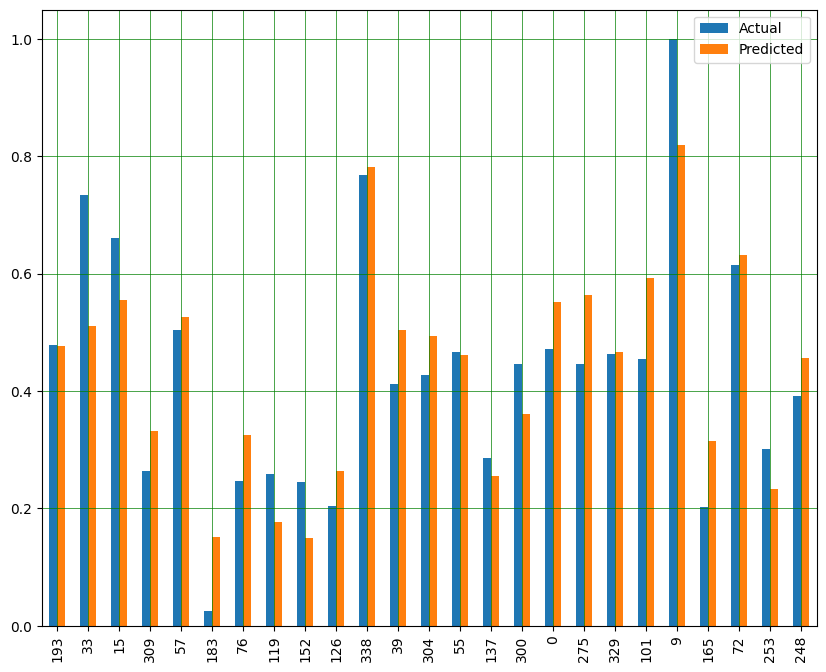

In [69]:
df = pd.DataFrame({'Actual':y_test, 'Predicted': y_pred})
df1 = df.head(25)
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major',linestyle='-',linewidth='0.5',color='green')
plt.grid(which='minor',linestyle=':',linewidth='0.5',color='black')
plt.show()

# Polynomial Regression

In [70]:
poly=PolynomialFeatures(degree=11)
poly_x=poly.fit_transform(x)
regressor=LinearRegression()
regressor.fit(poly_x,y)
y_pred=regressor.predict(poly.fit_transform(x_test))
print("Mean squared error is: ", mse(y_test,y_pred))
errors = abs(y_pred-y_test)
print('Mean Absolute Error: ', round(np.mean(errors), 2))
print('R2 score is: ', r2_score(y_test, y_pred))
print('Median absolute error is: ', median_absolute_error(y_test,y_pred))

Mean squared error is:  2.714244952289829e-24
Mean Absolute Error:  0.0
R2 score is:  1.0
Median absolute error is:  1.0103029524088925e-13


In [71]:
df = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df1=df.head(25)

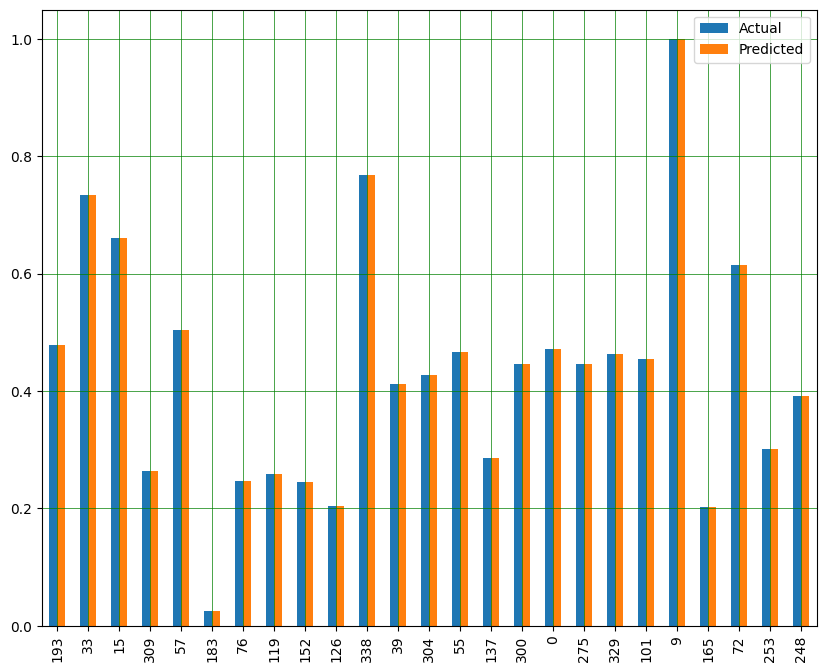

In [72]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major',linestyle='-',linewidth='0.5',color='green')
plt.grid(which='minor',linestyle=':',linewidth='0.5',color='black')
plt.show()

#Cart Decision Tree

In [73]:
regressor = DecisionTreeRegressor(max_leaf_nodes=15, min_samples_leaf=7, max_depth=10)
regressor.fit(x_train,y_train)
y_pred=regressor.predict(x_test)
print("Mean squared error is: ", mse(y_test,y_pred))
errors = abs(y_pred-y_test)
print('Mean Absolute Error: ', round(np.mean(errors), 2))
print('R2 score is: ', r2_score(y_test, y_pred))
print('Median absolute error is: ', median_absolute_error(y_test,y_pred))
print('Accuracy is: ', regressor.score(x_test, y_test)*100)

Mean squared error is:  0.014777772749176873
Mean Absolute Error:  0.1
R2 score is:  0.6287551380929136
Median absolute error is:  0.0905978306938755
Accuracy is:  62.87551380929136


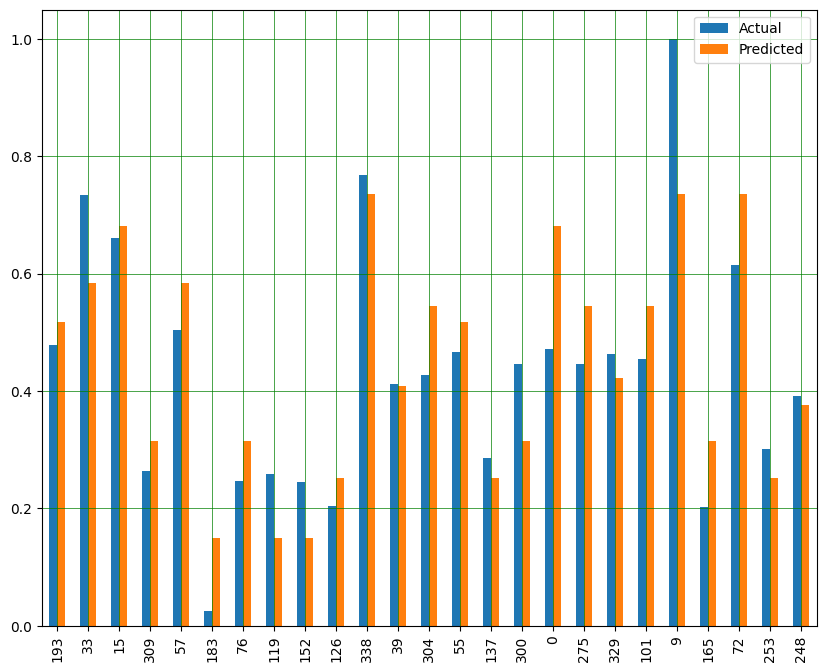

In [74]:
df = pd.DataFrame({'Actual':y_test, 'Predicted': y_pred})
df1 = df.head(25)
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major',linestyle='-',linewidth='0.5',color='green')
plt.grid(which='minor',linestyle=':',linewidth='0.5',color='black')
plt.show()

# Random Forest

In [75]:
clf = RandomForestRegressor(n_estimators=100, max_depth=2,random_state=0)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
print("Mean squared error is: ", mse(y_test,y_pred))
errors = abs(y_pred-y_test)
print('Mean Absolute Error: ', round(np.mean(errors), 2))
print('R2 score is: ', r2_score(y_test, y_pred))
print('Median absolute error is: ', median_absolute_error(y_test,y_pred))
print('Accuracy is: ', clf.score(x_test, y_test)*100)

Mean squared error is:  0.014752598682400097
Mean Absolute Error:  0.1
R2 score is:  0.629387557003585
Median absolute error is:  0.07694932766098073
Accuracy is:  62.9387557003585


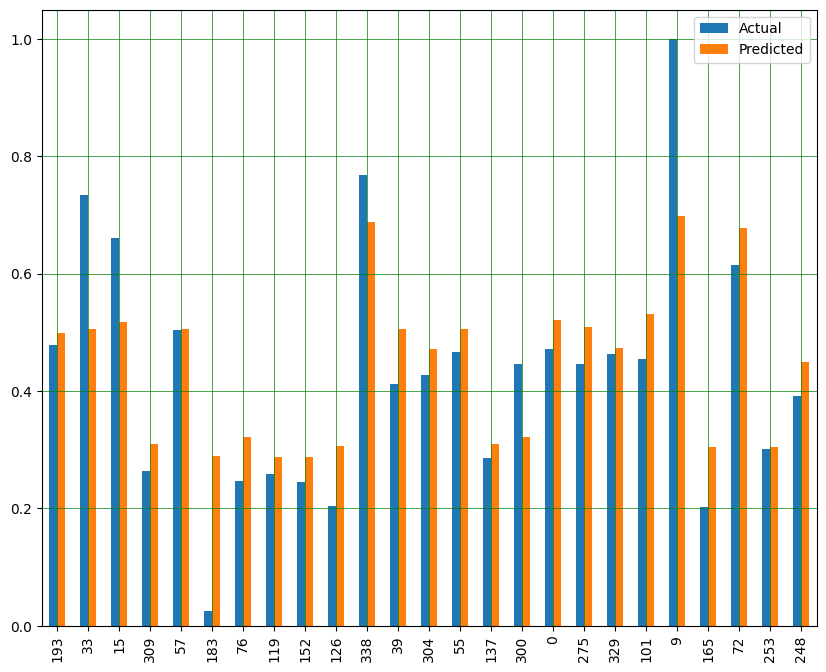

In [76]:
df = pd.DataFrame({'Actual':y_test, 'Predicted': y_pred})
df1 = df.head(25)
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major',linestyle='-',linewidth='0.5',color='green')
plt.grid(which='minor',linestyle=':',linewidth='0.5',color='black')
plt.show()

# Nerual Network

In [77]:
clf = MLPRegressor(solver='lbfgs',alpha=1e-5,hidden_layer_sizes=(5,2),random_state=1)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
print("Mean squared error is: ", mse(y_test,y_pred))
errors = abs(y_pred-y_test)
print('Mean Absolute Error: ', round(np.mean(errors), 2))
print('R2 score is: ', r2_score(y_test, y_pred))
print('Median absolute error is: ', median_absolute_error(y_test,y_pred))
print('Accuracy is: ', clf.score(x_test, y_test)*100)

Mean squared error is:  0.04214543499682266
Mean Absolute Error:  0.17
R2 score is:  -0.058770929894088164
Median absolute error is:  0.14517232160646842
Accuracy is:  -5.877092989408816


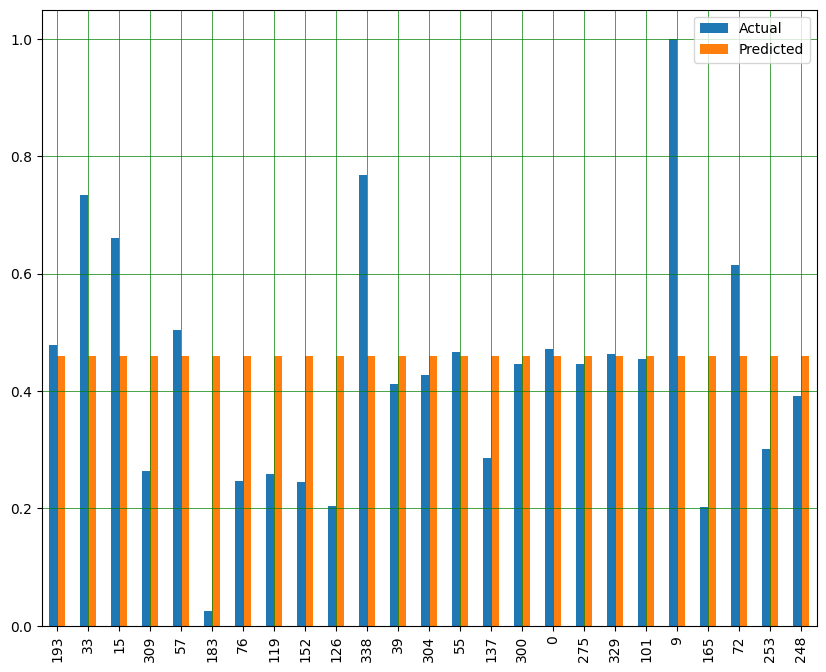

In [78]:
df = pd.DataFrame({'Actual':y_test, 'Predicted': y_pred})
df1 = df.head(25)
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major',linestyle='-',linewidth='0.5',color='green')
plt.grid(which='minor',linestyle=':',linewidth='0.5',color='black')
plt.show()